# IMPORT DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import metrics


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/BusanaMuslim/Data_1_to_Train.csv')
df.head(5)

,rating,Stemming,label
0,1.0,bahan diamond crepenya bagus berkalikali beli ...,negatif
1,2.0,bahan tegak dahi potong hijab simetris jadi be...,negatif
2,1.0,barang sesuai pesan order warna dark denim hijau,negatif
3,2.0,mohon maaf kasih bintang untuk voal poplin trn...,negatif
4,1.0,seller ramah respon confirm foto order balesan...,negatif


In [ ]:
print(f"Rating 1-2 = {len(df[(df['rating'] == 1.0) | (df['rating'] == 2.0)])} rows")
print(f"Rating 3 = {len(df[df['rating'] == 3.0])} rows")
print(f"Rating 4-5 = {len(df[(df['rating'] == 4.0) | (df['rating'] == 5.0)])} rows")


Rating 1-2 = 536 rows
Rating 3 = 731 rows
Rating 4-5 = 11757 rows


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13024 entries, 0 to 13023
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    13024 non-null  float64
 1   Stemming  13022 non-null  object 
 2   label     13024 non-null  object 
dtypes: float64(1), object(2)
memory usage: 305.4+ KB


In [ ]:
df.isnull().sum()

rating      0
Stemming    2
label       0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

rating      0
Stemming    0
label       0
dtype: int64

In [ ]:
print(f"Rating 1-2 = {len(df[(df['rating'] == 1.0) | (df['rating'] == 2.0)])} rows")
print(f"Rating 3 = {len(df[df['rating'] == 3.0])} rows")
print(f"Rating 4-5 = {len(df[(df['rating'] == 4.0) | (df['rating'] == 5.0)])} rows")


Rating 1-2 = 536 rows
Rating 3 = 730 rows
Rating 4-5 = 11756 rows


# PEMBOBOTAN TFIDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

tfidf = TfidfTransformer()
clf = CountVectorizer()

X_cv = clf.fit_transform(df['Stemming'].values.astype('U'))
tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

# PEMBAGIAN DATA TRAINING DAN TESTING

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tf, df['label'], test_size = 0.40, stratify=df['label'], random_state = 0)

# SVM

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel #class_weight='balanced'

#Train the model using the training sets
clf_svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf_svm.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_svm, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_svm, average='weighted'))

print(classification_report(y_test, y_pred_svm))

Accuracy: 0.9042042618544827
Precision: 0.8637999672468838
Recall: 0.9042042618544827
              precision    recall  f1-score   support

     negatif       0.67      0.07      0.12       214
      netral       0.31      0.02      0.03       292
     positif       0.91      1.00      0.95      4703

    accuracy                           0.90      5209
   macro avg       0.63      0.36      0.37      5209
weighted avg       0.86      0.90      0.86      5209



In [ ]:
print("\nData Asli:")
print(y_test.value_counts())

# Prediksi label dengan menggunakan seluruh data
y_pred_all = clf_svm.predict(X_test)
print("\nPrediksi Label dengan Seluruh Data:")
print(pd.Series(y_pred_all).value_counts())


Data Asli:
positif    4703
netral      292
negatif     214
Name: label, dtype: int64

Prediksi Label dengan Seluruh Data:
positif    5172
negatif      21
netral       16
dtype: int64


### class

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_svm2 = svm.SVC(class_weight='balanced', kernel='linear') # Linear Kernel #class_weight='balanced'

#Train the model using the training sets
clf_svm2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm2 = clf_svm2.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm2))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_svm2, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_svm2, average='weighted'))

print(classification_report(y_test, y_pred_svm2))

Accuracy: 0.8036091380303321
Precision: 0.8783053748774619
Recall: 0.8036091380303321
              precision    recall  f1-score   support

     negatif       0.21      0.43      0.28       214
      netral       0.16      0.31      0.21       292
     positif       0.95      0.85      0.90      4703

    accuracy                           0.80      5209
   macro avg       0.44      0.53      0.46      5209
weighted avg       0.88      0.80      0.84      5209



In [ ]:
print("\nData Asli:")
print(y_test.value_counts())

# Prediksi label dengan menggunakan seluruh data
y_pred_all2 = clf_svm2.predict(X_test)
print("\nPrediksi Label dengan Seluruh Data:")
print(pd.Series(y_pred_all2).value_counts())



Data Asli:
positif    4703
netral      292
negatif     214
Name: label, dtype: int64

Prediksi Label dengan Seluruh Data:
positif    4198
netral      566
negatif     445
dtype: int64


# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [ ]:
rf = RandomForestClassifier() #class_weight='balanced'
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_rf, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_rf, average='weighted'))

print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9024764830101747
Precision: 0.8536789341182425
Recall: 0.9024764830101747
              precision    recall  f1-score   support

     negatif       0.44      0.03      0.06       214
      netral       0.29      0.03      0.06       292
     positif       0.91      1.00      0.95      4703

    accuracy                           0.90      5209
   macro avg       0.55      0.35      0.36      5209
weighted avg       0.85      0.90      0.86      5209



In [ ]:
print("\nData Asli:")
print(y_test.value_counts())

# Prediksi label dengan menggunakan seluruh data
y_pred_all = rf.predict(X_test)
print("\nPrediksi Label dengan Seluruh Data:")
print(pd.Series(y_pred_all).value_counts())


Data Asli:
positif    4703
netral      292
negatif     214
Name: label, dtype: int64

Prediksi Label dengan Seluruh Data:
positif    5153
netral       36
negatif      20
dtype: int64


#### class w

In [ ]:
rf2 = RandomForestClassifier(class_weight='balanced') #class_weight='balanced'
rf2.fit(X_train, y_train)
y_pred_rfw = rf2.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfw))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_rfw, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_rfw, average='weighted'))

print(classification_report(y_test, y_pred_rfw))

Accuracy: 0.9013246304473027
Precision: 0.8468838328127603
Recall: 0.9013246304473027
              precision    recall  f1-score   support

     negatif       0.42      0.05      0.09       214
      netral       0.18      0.02      0.03       292
     positif       0.91      0.99      0.95      4703

    accuracy                           0.90      5209
   macro avg       0.50      0.35      0.36      5209
weighted avg       0.85      0.90      0.86      5209



In [ ]:
print("\nData Asli:")
print(y_test.value_counts())


print("\nPrediksi Label dengan Seluruh Data:")
print(pd.Series(y_pred_rfw).value_counts())


Data Asli:
positif    4703
netral      292
negatif     214
Name: label, dtype: int64

Prediksi Label dengan Seluruh Data:
positif    5155
netral       28
negatif      26
dtype: int64


# LOGISTIC REGRESION

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(class_weight='balanced',solver='lbfgs', max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_logreg, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_logreg, average='weighted'))

print(classification_report(y_test, y_pred_logreg))

Accuracy: 0.7920906124016126
Precision: 0.8853674239564259
Recall: 0.7920906124016126
              precision    recall  f1-score   support

     negatif       0.22      0.47      0.30       214
      netral       0.16      0.37      0.22       292
     positif       0.96      0.83      0.89      4703

    accuracy                           0.79      5209
   macro avg       0.45      0.56      0.47      5209
weighted avg       0.89      0.79      0.83      5209



In [ ]:
print("\nData Asli:")
print(y_test.value_counts())

# Prediksi label dengan menggunakan seluruh data
y_pred_all = logreg.predict(X_test)
print("\nPrediksi Label dengan Seluruh Data:")
print(pd.Series(y_pred_all).value_counts())


Data Asli:
positif    4703
netral      292
negatif     214
Name: label, dtype: int64

Prediksi Label dengan Seluruh Data:
positif    4079
netral      676
negatif     454
dtype: int64


In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_logreg, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_logreg, average='weighted'))

print(classification_report(y_test, y_pred_logreg))

Accuracy: 0.9053561144173545
Precision: 0.8721716905812047
Recall: 0.9053561144173545
              precision    recall  f1-score   support

     negatif       0.58      0.07      0.12       214
      netral       0.50      0.03      0.06       292
     positif       0.91      1.00      0.95      4703

    accuracy                           0.91      5209
   macro avg       0.66      0.37      0.38      5209
weighted avg       0.87      0.91      0.87      5209



In [ ]:
print("\nData Asli:")
print(y_test.value_counts())

# Prediksi label dengan menggunakan seluruh data
y_pred_all = logreg.predict(X_test)
print("\nPrediksi Label dengan Seluruh Data:")
print(pd.Series(y_pred_all).value_counts())


Data Asli:
positif    4703
netral      292
negatif     214
Name: label, dtype: int64

Prediksi Label dengan Seluruh Data:
positif    5165
negatif      24
netral       20
dtype: int64


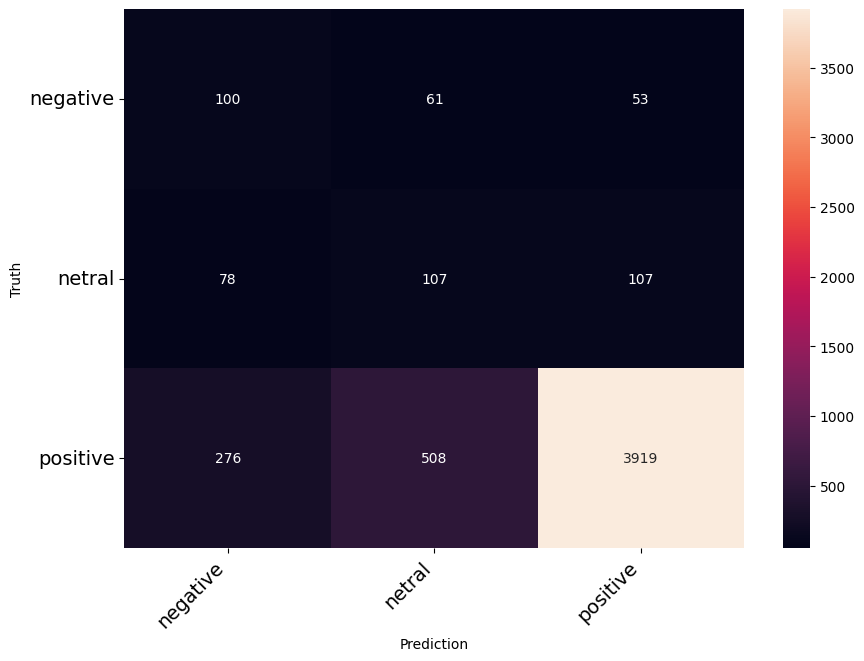

In [ ]:
def cnf_matrix_lr(confusion_matrix, class_names, figsize=(10,7), fontsize=14):
  df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns= class_names)
  fig = plt.figure(figsize=figsize)
  try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  except ValueError:
    raise ValueError('Confusion matrix values must be integer.')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
  plt.ylabel('Truth')
  plt.xlabel('Prediction')


cm = confusion_matrix(y_test, y_pred_logreg)
cnf_matrix_lr(cm, class_label)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg2 = LogisticRegression( class_weight='balanced',solver='lbfgs', max_iter=1000)

# fit the model with data
logreg2.fit(X_train, y_train)

y_pred_logreg2 = logreg2.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_logreg, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_logreg, average='micro'))

print(classification_report(y_test, y_pred_logreg))

Accuracy: 0.7920906124016126


ValueError: ignored

In [ ]:
print("\nData Asli:")
print(y_test.value_counts())

# Prediksi label dengan menggunakan seluruh data
y_pred_all2 = logreg2.predict(X_test)
print("\nPrediksi Label dengan Seluruh Data:")
print(pd.Series(y_pred_all2).value_counts())


Data Asli:
positif    4703
netral      292
negatif     214
Name: label, dtype: int64

Prediksi Label dengan Seluruh Data:
positif    4079
netral      676
negatif     454
dtype: int64


# CONFUSION MATRIX

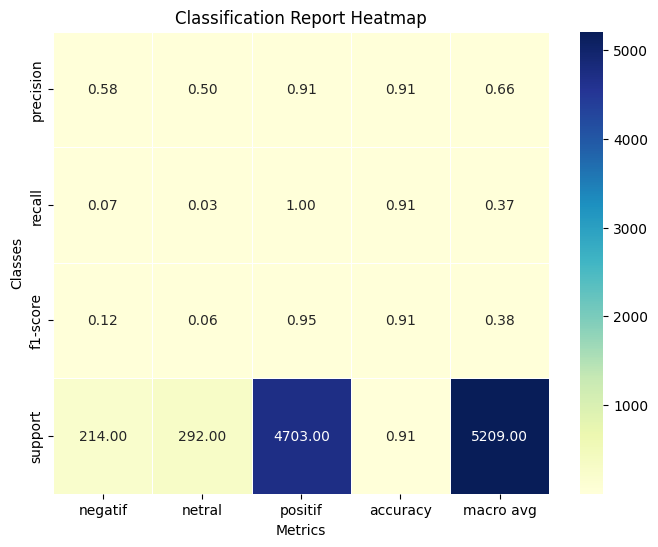

In [ ]:
# Classification report
report = classification_report(y_test, y_pred_logreg, output_dict=True)

# Konversi ke DataFrame dan tampilkan
report_df = pd.DataFrame(report).transpose()
# print(report_df)

# Visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.savefig("/content/drive/MyDrive/dataset/Klasifikasi_shoppe/BusanaMuslim/Predict_LR_NoCG/Classification_report.png")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
class_label = ["negative", 'netral',"positive"]

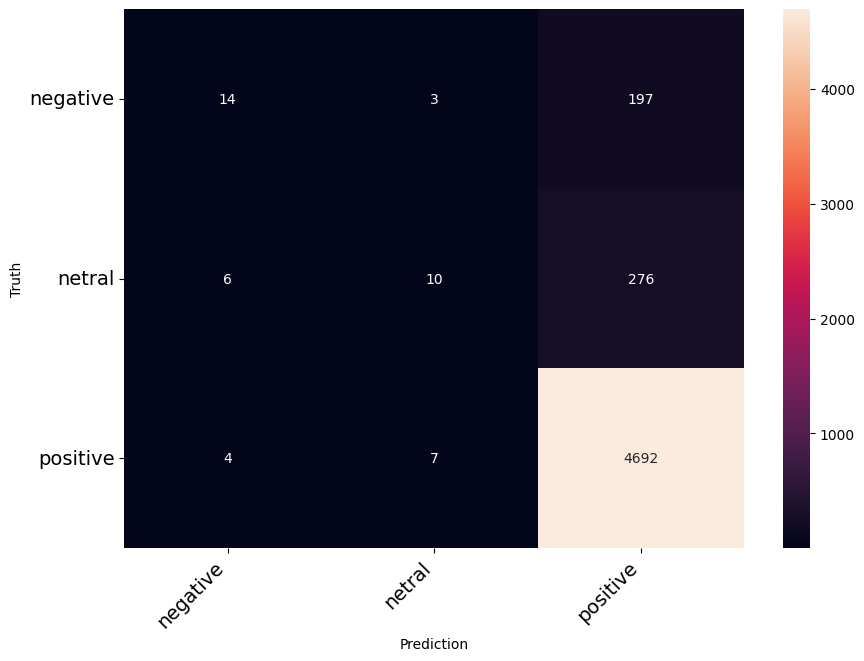

In [ ]:
def cnf_matrix_rf(confusion_matrix, class_names, figsize=(10,7), fontsize=14):
  df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns= class_names)
  fig = plt.figure(figsize=figsize)
  try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  except ValueError:
    raise ValueError('Confusion matrix values must be integer.')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
  plt.ylabel('Truth')
  plt.xlabel('Prediction')
  plt.savefig("/content/drive/MyDrive/dataset/Klasifikasi_shoppe/BusanaMuslim/Predict_LR_NoCG/Confusion_Matrix.png")


cm = confusion_matrix(y_test, y_pred_logreg)
cnf_matrix_rf(cm, class_label)

# Predict Data

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/BusanaMuslim/Predict.csv')
df2.head(5)

,rating,Stemming
0,1.0,datang ukur
1,1.0,pesan hitam datatang putih
2,2.0,parah anak
3,1.0,datang ukran anak
4,1.0,paket kirain gede datang kaybaju kls kecewa


In [ ]:
df2.isnull().sum()

rating      0
Stemming    1
dtype: int64

In [ ]:
df2 = df2.dropna()

In [ ]:
len(df2)

13026

In [ ]:
document = df2['Stemming'].values.tolist()

In [ ]:
X_new_cv = clf.transform(document)

# Menggunakan TfidfTransformer untuk transformasi vektor yang baru
X_new_tf = tf_transformer.transform(X_new_cv)

In [ ]:
y_pred_new = logreg.predict(X_new_tf)

In [ ]:
y_pred_new

array(['positif', 'positif', 'negatif', ..., 'positif', 'positif',
       'positif'], dtype=object)

In [ ]:
df2['Predicted_Labels'] = y_pred_new
df2

,rating,Stemming,Predicted_Labels
0,1.0,datang ukur,positif
1,1.0,pesan hitam datatang putih,positif
2,2.0,parah anak,negatif
3,1.0,datang ukran anak,positif
4,1.0,paket kirain gede datang kaybaju kls kecewa,positif
...,...,...,...
13022,5.0,baguss cepat maaf pakai fto barabg ambil k lan...,positif
13023,5.0,baguss harga segituu paket cepat banget,positif
13024,5.0,beli kirim cepat bahan bagus harga murah bangett,positif
13025,5.0,bahan bagus kirim cepat recomend jual customer...,positif


In [ ]:

print("\nPrediksi Label dengan Seluruh Data:")
print(pd.Series(y_pred_new).value_counts())


Prediksi Label dengan Seluruh Data:
positif    12844
negatif      112
netral        70
dtype: int64


In [ ]:
df2.to_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/BusanaMuslim/Predict_LR_NoCG/Hasil_Predict.csv')